First Step is to import our dataset

In [19]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from pathlib import Path
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor


Summary:
 - Importing the Dataset 
 - Initial Exploration
 - Data Cleaning
 - Data Exploration Analysis
 - Model Preparation
 - Choosing the Model
 - Performance Evaluation
 - Upgrades

## Importing the Dataset

In this section, we will import the dataset that will be used for our analysis and model building. The dataset is stored in a CSV file, and we will use the `pandas` library to read the data into a DataFrame. 

In [20]:

path_to_repo = Path('..').resolve()
path_to_data = path_to_repo / 'MLP-Project' / 'DS.csv'
ds = pd.read_csv(path_to_data)

## Initial Exploration

We will then explore the initial structure of the dataset to understand the types of data we are dealing with, which will help us in the  steps of data cleaning and preparation.

In [21]:
ds.head()

,Car_Weight_kg,Engine_Power_hp,Max_Torque_Nm,Top_Speed_kmh,Acceleration_0_100_kmh,Weight_Distribution_percentage,Transmission_Type,Gear_Count,Front_Tire_Pressure_bar,Rear_Tire_Pressure_bar,...,Fastest_Lap_Time_s,Slowest_Lap_Time_s,Front_Tire_Degradation_percentage,Rear_Tire_Degradation_percentage,Tire_Changes_Count,Gearbox_Condition,Engine_Condition,Technical_Problems,Trajectory_Changes,Lap_Time_s
0,1166.573849,554.930603,637.929026,336.418878,2.893342,49.531396,sequential,6,1.898217,2.199391,...,87.194660,108.711507,32.700626,0.331597,2,bad,good,no,6,149.737564
1,1189.760694,498.659075,596.467555,327.300866,2.796104,46.640600,sequential,7,1.863087,2.120934,...,98.347423,94.730637,16.981057,9.109779,0,bad,acceptable,no,9,165.125788
2,1225.952538,519.794165,623.394871,312.762170,2.998413,51.227573,manual,7,2.036742,1.934686,...,92.914349,98.070996,19.770091,22.355819,0,good,acceptable,no,5,170.393588
3,1225.857283,549.481236,597.961921,294.881591,3.260339,53.679324,manual,6,2.293175,1.818957,...,95.320849,104.994490,26.810674,22.242030,0,acceptable,good,no,4,164.537845
4,1239.871744,597.190907,520.673535,352.168869,2.966039,37.488446,sequential,7,2.361154,2.144738,...,85.558839,95.160124,23.416187,19.040806,2,bad,good,no,9,162.077616


In [22]:
ds.columns

Index(['Car_Weight_kg', 'Engine_Power_hp', 'Max_Torque_Nm', 'Top_Speed_kmh',
       'Acceleration_0_100_kmh', 'Weight_Distribution_percentage',
       'Transmission_Type', 'Gear_Count', 'Front_Tire_Pressure_bar',
       'Rear_Tire_Pressure_bar', 'Front_Tire_Diameter_cm',
       'Rear_Tire_Diameter_cm', 'Front_Suspension', 'Rear_Suspension',
       'Aerodynamics_Drag_Coefficient_Cd', 'Frontal_Area_m2', 'Fuel_Type',
       'Fuel_Consumption_L_100km', 'Front_Brake_Temperature_C',
       'Rear_Brake_Temperature_C', 'Differential_Type',
       'Front_Camber_Angle_deg', 'Rear_Camber_Angle_deg', 'Front_Brakes',
       'Rear_Brakes', 'Track_Temperature_C', 'Ambient_Temperature_C',
       'Humidity_percentage', 'Wind_Speed_kmh', 'Wind_Direction_deg',
       'Track_Condition', 'Track_Altitude_m', 'Track_Length_km',
       'Surface_Type', 'Number_of_Corners', 'Number_of_Straights',
       'Max_Gradient_percentage', 'Number_of_Laps', 'Driver_Reflexes_ms',
       'Driver_Experience', 'Driver_Fatigu

In [23]:
missing_data = ds.isnull().sum()
missing_data[missing_data != 0]

Series([], dtype: int64)

In [24]:
non_numeric_columns = ds.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Transmission_Type', 'Front_Suspension', 'Rear_Suspension', 'Fuel_Type',
       'Differential_Type', 'Front_Brakes', 'Rear_Brakes', 'Track_Condition',
       'Surface_Type', 'Driver_Experience', 'Race_Strategy',
       'Gearbox_Condition', 'Engine_Condition', 'Technical_Problems'],
      dtype='object')


## Data Cleaning

During our Initial Exploration, even if we could neither find any missing values in the DataFrame nor values that should be normalized, we found few columns with non-numerical values. In order to prepare for our Model, we will transform them into numerical values.

In [25]:
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    ds[column] = le.fit_transform(ds[column])
    label_encoders[column] = le

ds.head()

,Car_Weight_kg,Engine_Power_hp,Max_Torque_Nm,Top_Speed_kmh,Acceleration_0_100_kmh,Weight_Distribution_percentage,Transmission_Type,Gear_Count,Front_Tire_Pressure_bar,Rear_Tire_Pressure_bar,...,Fastest_Lap_Time_s,Slowest_Lap_Time_s,Front_Tire_Degradation_percentage,Rear_Tire_Degradation_percentage,Tire_Changes_Count,Gearbox_Condition,Engine_Condition,Technical_Problems,Trajectory_Changes,Lap_Time_s
0,1166.573849,554.930603,637.929026,336.418878,2.893342,49.531396,2,6,1.898217,2.199391,...,87.194660,108.711507,32.700626,0.331597,2,1,2,0,6,149.737564
1,1189.760694,498.659075,596.467555,327.300866,2.796104,46.640600,2,7,1.863087,2.120934,...,98.347423,94.730637,16.981057,9.109779,0,1,0,0,9,165.125788
2,1225.952538,519.794165,623.394871,312.762170,2.998413,51.227573,1,7,2.036742,1.934686,...,92.914349,98.070996,19.770091,22.355819,0,2,0,0,5,170.393588
3,1225.857283,549.481236,597.961921,294.881591,3.260339,53.679324,1,6,2.293175,1.818957,...,95.320849,104.994490,26.810674,22.242030,0,0,2,0,4,164.537845
4,1239.871744,597.190907,520.673535,352.168869,2.966039,37.488446,2,7,2.361154,2.144738,...,85.558839,95.160124,23.416187,19.040806,2,1,2,0,9,162.077616


## Data Exploration Analysis

We will now analyse the data and search for correlations between different columns using the correlation matrix and a heatmap.

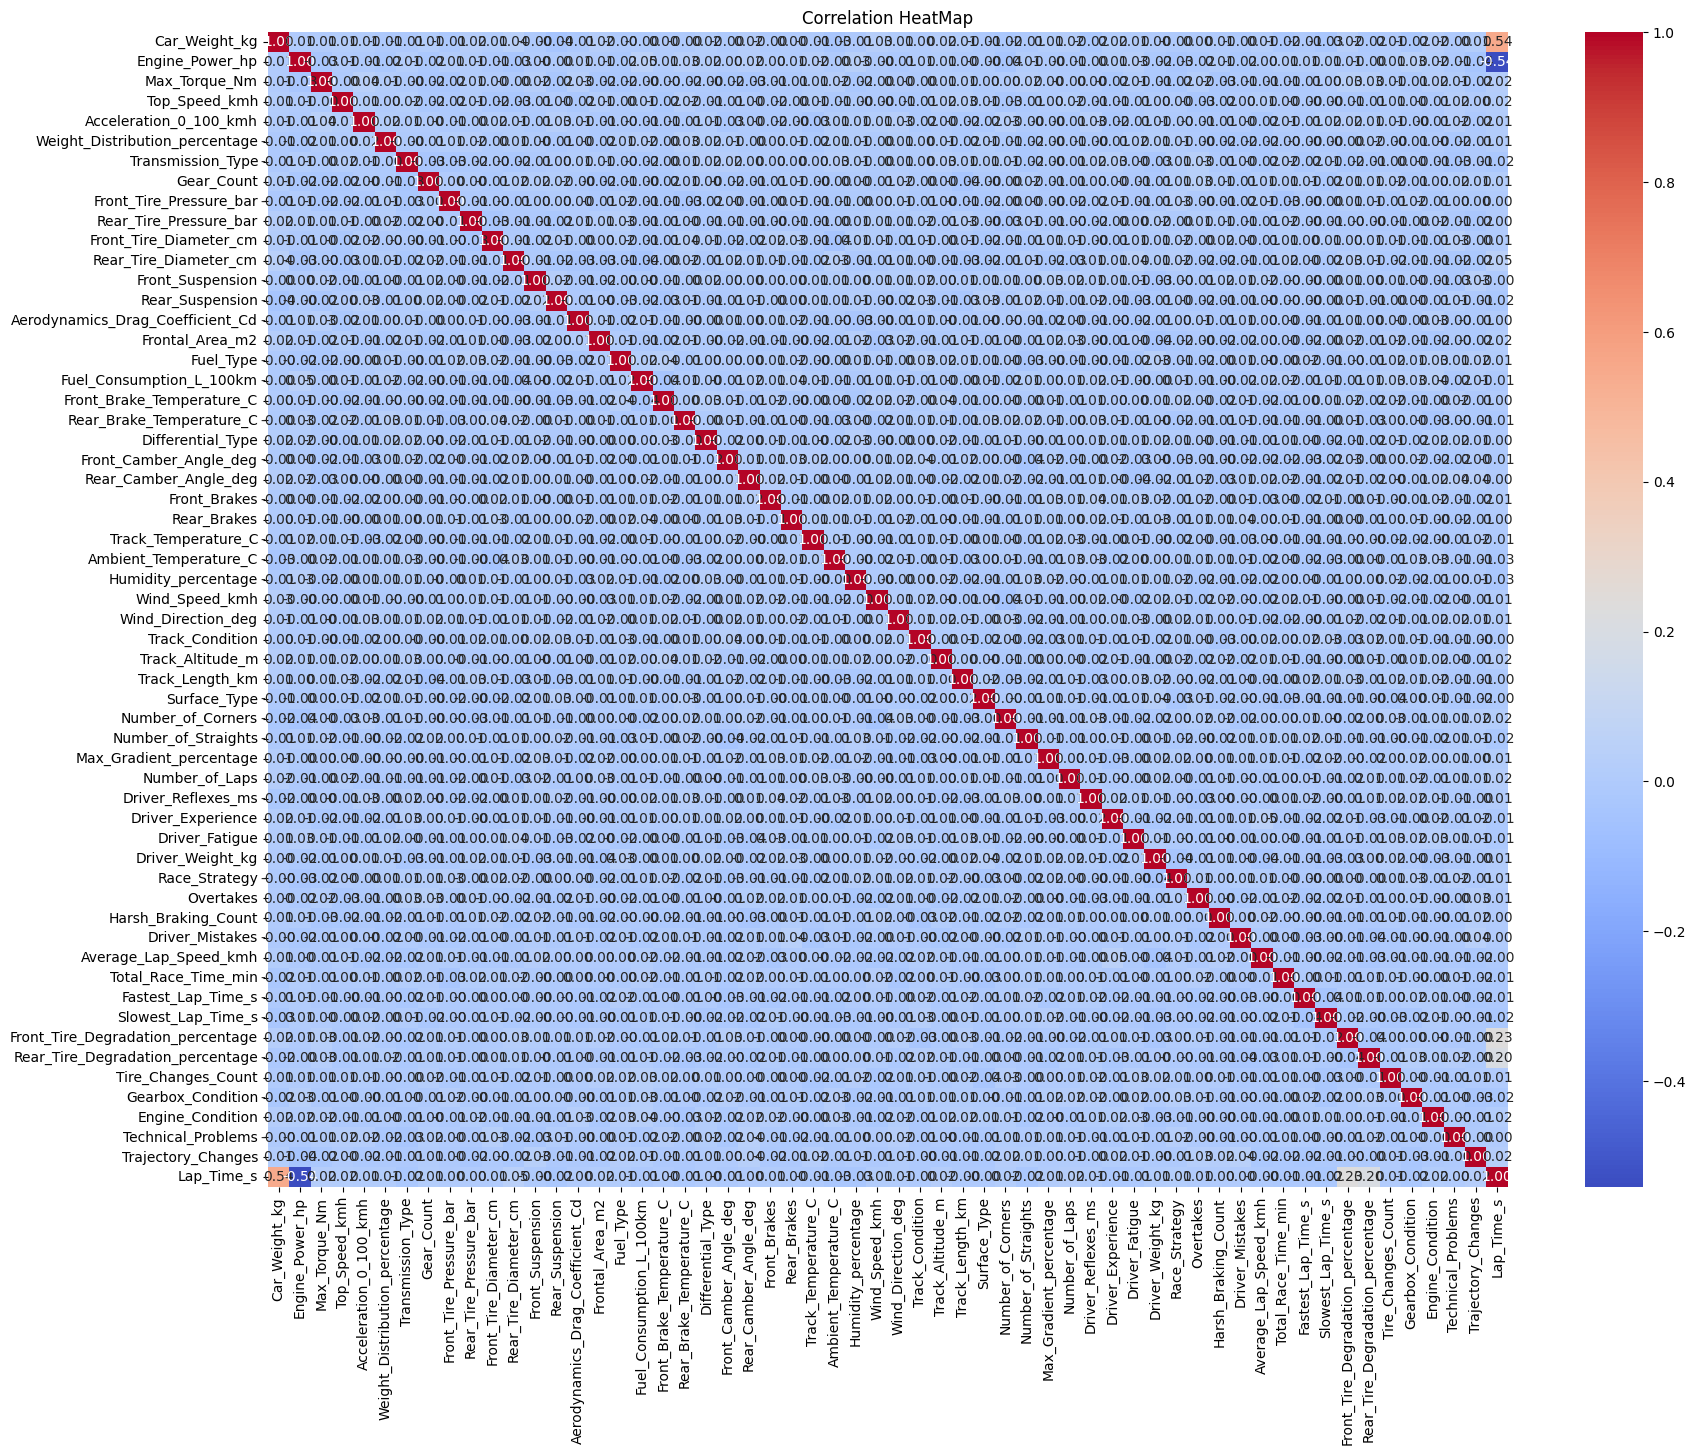

,Car_Weight_kg,Engine_Power_hp,Max_Torque_Nm,Top_Speed_kmh,Acceleration_0_100_kmh,Weight_Distribution_percentage,Transmission_Type,Gear_Count,Front_Tire_Pressure_bar,Rear_Tire_Pressure_bar,...,Fastest_Lap_Time_s,Slowest_Lap_Time_s,Front_Tire_Degradation_percentage,Rear_Tire_Degradation_percentage,Tire_Changes_Count,Gearbox_Condition,Engine_Condition,Technical_Problems,Trajectory_Changes,Lap_Time_s
Car_Weight_kg,1.000000,0.005692,0.006528,0.012984,0.011795,-0.006221,-0.007250,0.014472,-0.012535,0.022743,...,-0.005452,-0.028228,0.024633,-0.016586,0.006141,-0.017706,0.019127,-0.004717,0.014105,0.544440
Engine_Power_hp,0.005692,1.000000,-0.031355,0.005188,-0.005124,-0.019947,0.012998,-0.020523,0.008236,0.007661,...,0.007130,0.007076,0.005315,-0.003571,0.007627,0.034394,0.015218,-0.007745,-0.036971,-0.541350
Max_Torque_Nm,0.006528,-0.031355,1.000000,-0.002683,0.038857,0.009196,-0.003455,-0.023648,-0.024197,0.010245,...,-0.010687,0.001711,0.033290,0.028236,0.006327,-0.005808,0.019328,0.012110,-0.019962,0.022606
Top_Speed_kmh,0.012984,0.005188,-0.002683,1.000000,0.013562,0.004191,0.016109,-0.018201,-0.015058,0.007076,...,-0.003917,-0.001519,-0.008209,-0.012429,0.006043,0.004867,-0.006663,0.019930,0.003293,0.015989
Acceleration_0_100_kmh,0.011795,-0.005124,0.038857,0.013562,1.000000,0.015951,0.005592,0.002632,-0.008126,-0.003773,...,-0.006614,0.017540,0.023386,0.011923,0.007942,-0.003540,-0.008007,0.022855,-0.015260,0.009223
Weight_Distribution_percentage,-0.006221,-0.019947,0.009196,0.004191,0.015951,1.000000,-0.003433,-0.005181,0.014184,0.020345,...,-0.004893,-0.002027,-0.000119,0.016240,-0.003799,-0.007096,0.001919,-0.022976,-0.010411,0.011082
Transmission_Type,-0.007250,0.012998,-0.003455,0.016109,0.005592,-0.003433,1.000000,-0.033072,-0.029402,-0.017345,...,-0.020576,0.011054,-0.022842,-0.014517,-0.001231,0.001558,-0.007095,-0.032737,-0.009120,-0.020667
Gear_Count,0.014472,-0.020523,-0.023648,-0.018201,0.002632,-0.005181,-0.033072,1.000000,0.003779,0.004481,...,0.013310,-0.022979,0.011401,0.010978,0.022706,-0.010815,0.003991,0.017293,0.007300,0.013159
Front_Tire_Pressure_bar,-0.012535,0.008236,-0.024197,-0.015058,-0.008126,0.014184,-0.029402,0.003779,1.000000,-0.008770,...,-0.002882,-0.002460,0.012814,0.006051,-0.014780,0.022588,-0.008204,0.004861,0.000460,0.000940
Rear_Tire_Pressure_bar,0.022743,0.007661,0.010245,0.007076,-0.003773,0.020345,-0.017345,0.004481,-0.008770,1.000000,...,-0.003022,-0.006081,-0.002115,-0.002876,-0.009579,-0.002600,0.016251,-0.007481,-0.024707,0.001375


In [26]:
%matplotlib inline

correlation_matrix = ds.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

correlation_matrix

We can see that the correlations between the columns are mostly extremely low.

## Model Preparation

The next step will be to separate the column we would like to predict from the rest of the DataFrame and split it into 3 different sets for Training, Testing and Validating.

In [27]:
ds_Y = ds["Lap_Time_s"]
ds_X = ds.drop(columns=["Lap_Time_s"])

ds_X_train, ds_X_valid, ds_Y_train, ds_Y_valid = train_test_split(ds_X, ds_Y, test_size=0.2, random_state=42)



## Choosing the Model


In [28]:

lr_model = LinearRegression()
lr_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(lr_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.132545018410589


In [29]:
ridge_model = Ridge(random_state=42, alpha=0.5, solver='cholesky', tol=0.0001)
ridge_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(ridge_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.132448965039835


In [30]:
lasso_model = Lasso(random_state=42, alpha=0.1, max_iter=10000)

lasso_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(lasso_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.107150930574922


In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(rf_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.5067057857775525


In [32]:
rfc_model = DecisionTreeRegressor(random_state=42, max_depth=5)
rfc_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(rfc_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 6.293513154492034


In [33]:
xtr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
xtr_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(xtr_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.480904303182416


## Upgrades


In [34]:
final_model = Lasso(random_state=42, alpha=0.5, max_iter=1000, tol=0.0001)
final_model.fit(ds_X_train, ds_Y_train)
cv_scores = cross_val_score(final_model, ds_X, ds_Y, cv=5, scoring='neg_mean_squared_error')

print("Mean cross-validation score (RMSE):", np.sqrt(-cv_scores).mean())

Mean cross-validation score (RMSE): 5.101122894576902


In [35]:
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']